# PyTorch Basic Tutorials


- Fold, Unfold operations
- Transpose operations
- Attempt to use convolution for one image and weight bank 

In [122]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import numpy as np
import matplotlib.pyplot as plt

## Convolution operation

- Define weight filters of size 5x5x3. There are 10 such filters.
- Input image is of size 10x10x3. There are 2 such images.
- We unfold the input image
- After that, we do matrix multiplication with the weight pool and input image. Then that output image is folded into a suitably sized output as follows:
- *kernel_size* parameter in unfold() function refers to the filter size in weights1
- Convolution is equivalent with Unfold + Matrix Multiplication + Fold 

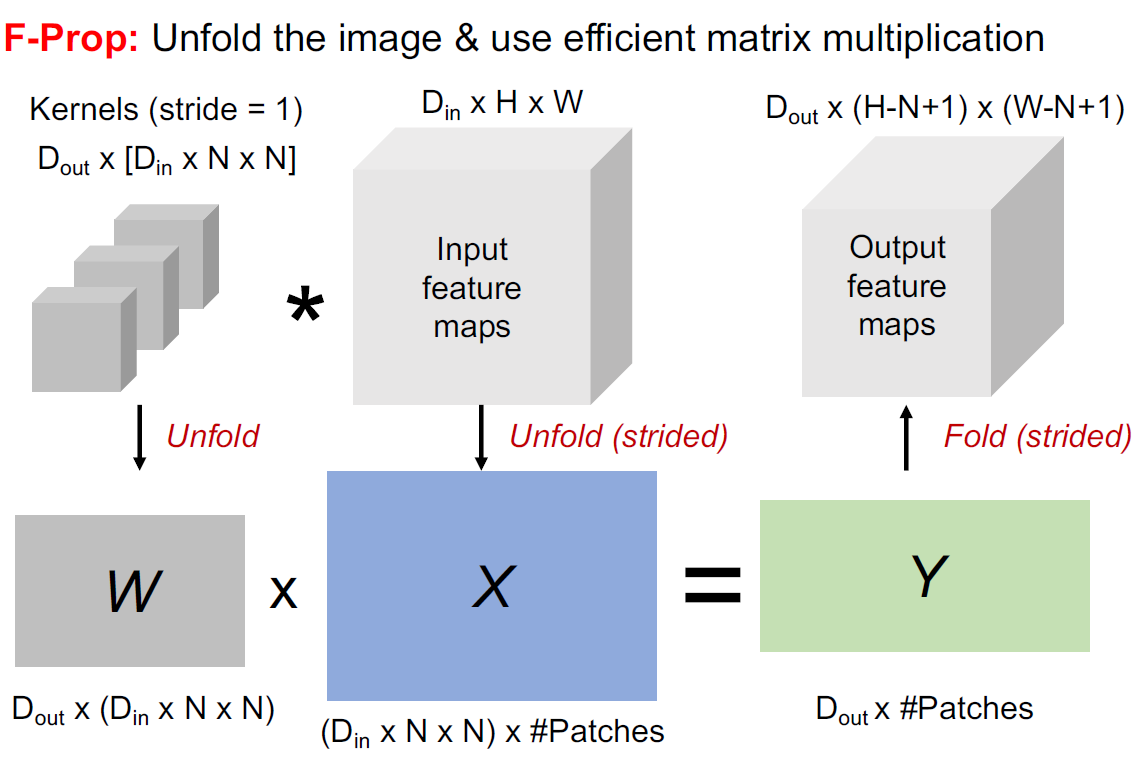



In [130]:
#Declaring weights and input
input_img = torch.randn(10,3,10,10)
weights1 = torch.randn(2,3,5,5)
bias = torch.ones(2)
new_h = input_img.size(-2)-weights1.size(-2)+1
new_w = input_img.size(-1)-weights1.size(-1)+1

print("Input size: ", input_img.size())
print("\t Number of images: ", input_img.size(0))
print("\n\nWeigths size: ", weights1.size())
print("\t Number of filters: ", weights1.size(0))


Input size:  torch.Size([10, 3, 10, 10])
	 Number of images:  10


Weigths size:  torch.Size([2, 3, 5, 5])
	 Number of filters:  2


In [131]:
#Unfolding the input according to the filter size

input_unfolded = f.unfold(input_img, kernel_size = weights1.size(-1))

print("Number of images: ", input_unfolded.size(0))
print("Size of each input_unfolded image: ", (input_unfolded.size(-2), input_unfolded.size(-1)))
print("\t=> Number of patches: ",input_unfolded.size(-1))
print("\t=> Number of points in 1 filter: ", input_unfolded.size(-2))

Number of images:  10
Size of each input_unfolded image:  (75, 36)
	=> Number of patches:  36
	=> Number of points in 1 filter:  75


In [132]:
#Unfold the weights 
weight_unfolded = weights1.view(weights1.size(0),-1).transpose(0,1)
#matrix multiply based on figure above
output_unfolded = input_unfolded.transpose(1,2).matmul(weight_unfolded).transpose(1,2)

#output_unfolded + bias
print("Output unfolded size: ",o_unf.size())

Output unfolded size:  torch.Size([2, 1, 36])


In [133]:
#Add bias

o_unf = output_unfolded.transpose(0,1)
for i in range(o_unf.size(0)):
    o_unf[i] += bias[i]

op_unf = o_unf.transpose(0,1)

In [134]:
#Fold the unfolded output to make the final 
output = f.fold(op_unf, output_size=(new_h, new_w), kernel_size=(1,1))
print("Output size: ",output.size())
print("Each of the", output.size(0), "images has",output.size(1)," activation maps of size: ", (output.size(-1), output.size(-2)))

Output size:  torch.Size([10, 2, 6, 6])
Each of the 10 images has 2  activation maps of size:  (6, 6)
